In [6]:

#AP21110011209

!pip install -U scikit-fuzzy # Installs or upgrades scikit-fuzzy, which contains skfuzzy

# Import necessary libraries
import kagglehub
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import skfuzzy as fuzz # Now skfuzzy should import correctly

# ... (rest of your code) ...
# Import necessary libraries
import kagglehub
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import skfuzzy as fuzz

# ----------------------------------------
# **Step 1: Dataset Download and Preparation**
# ----------------------------------------
# Download the Food-11 dataset using kagglehub
path = kagglehub.dataset_download("trolukovich/food11-image-dataset")
print("Path to dataset files:", path)

# Dataset path
dataset_path = path

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% for validation
)

# Training and validation data generators
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, 'training'),
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, 'training'),
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# ----------------------------------------
# **Step 2: Build and Train the CNN Model**
# ----------------------------------------
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(11, activation='softmax')  # 11 classes in Food-11
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# ----------------------------------------
# **Step 3: Single Image Prediction (CNN)**
# ----------------------------------------
def classify_image_with_cnn(img_path):
    """
    Predict the class of a single image using the trained CNN model.
    """
    # Load and preprocess the image
    img = tf.keras.utils.load_img(img_path, target_size=(128, 128))  # Load and resize
    img_array = tf.keras.utils.img_to_array(img)  # Convert to NumPy array
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize pixel values

    # Predict using the trained CNN
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]

    print(f"Raw CNN Prediction: {prediction}")
    print(f"Predicted Class (CNN): {predicted_class}")

    return prediction

# ----------------------------------------
# **Step 4: Fuzzy Logic Adjustment**
# ----------------------------------------
def apply_fuzzy_logic(predictions):
    """
    Adjust CNN predictions using fuzzy logic.
    """
    adjusted_predictions = []
    for pred in predictions:
        fuzzy_pred = fuzz.sigmf(pred, np.mean(pred), 1)  # Sigmoidal membership function
        adjusted_predictions.append(fuzzy_pred / np.sum(fuzzy_pred))  # Normalize
    return np.array(adjusted_predictions)

def classify_image_with_fuzzy_logic(img_path):
    """
    Predict the class of a single image using CNN and adjust the prediction with fuzzy logic.
    """
    # Get CNN prediction
    prediction = classify_image_with_cnn(img_path)

    # Apply fuzzy logic adjustment
    fuzzy_prediction = apply_fuzzy_logic(prediction)

    # Get fuzzy-adjusted predicted class
    fuzzy_predicted_class = np.argmax(fuzzy_prediction, axis=1)[0]

    print(f"Fuzzy-Adjusted Prediction: {fuzzy_prediction}")
    print(f"Predicted Class (Fuzzy Logic): {fuzzy_predicted_class}")

    return fuzzy_prediction

# ----------------------------------------
# **Step 5: Evaluate on a Single Image**
# ----------------------------------------
# Example image path (update with your actual image path)
test_image_path = "/content/e8cdb97b0d.jpg"

# CNN-only classification
print("\n--- CNN Classification ---")
cnn_prediction = classify_image_with_cnn(test_image_path)

# Fuzzy logic-adjusted classification
print("\n--- Fuzzy Logic Classification ---")
fuzzy_prediction = classify_image_with_fuzzy_logic(test_image_path)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 12.4 MB/s eta 0:00:00


100%|██████████| 1.08G/1.08G [00:38<00:00, 30.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/trolukovich/food11-image-dataset/versions/1
Found 7896 images belonging to 11 classes.
Found 1970 images belonging to 11 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │           1,419 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,393,739 (28.20 MB)

 Trainable params: 7,393,739 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


247/247 ━━━━━━━━━━━━━━━━━━━━ 74s 273ms/step - accuracy: 0.1499 - loss: 2.5506 - val_accuracy: 0.2472 - val_loss: 2.1297
Epoch 2/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 74s 259ms/step - accuracy: 0.2421 - loss: 2.1496 - val_accuracy: 0.2934 - val_loss: 2.0543
Epoch 3/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 79s 248ms/step - accuracy: 0.2820 - loss: 2.0295 - val_accuracy: 0.3122 - val_loss: 1.9640
Epoch 4/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 89s 276ms/step - accuracy: 0.3056 - loss: 1.9854 - val_accuracy: 0.2904 - val_loss: 1.9750
Epoch 5/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 72s 240ms/step - accuracy: 0.3181 - loss: 1.9659 - val_accuracy: 0.3345 - val_loss: 1.8889
Epoch 6/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 91s 278ms/step - accuracy: 0.3414 - loss: 1.8838 - val_accuracy: 0.3807 - val_loss: 1.8237
Epoch 7/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 73s 239ms/step - accuracy: 0.3467 - loss: 1.8713 - val_accuracy: 0.3873 - val_loss: 1.7691
Epoch 8/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 82s 242ms/step - accuracy: 0.3611 - loss: 1.8453 - val

THESE ARE THE OUTPUT IMAGES IF WE WANT TO SEE THEN IMPORT IMAGE TO COLAB AND PUT ITS PATH IN TEST IMAGE PATH

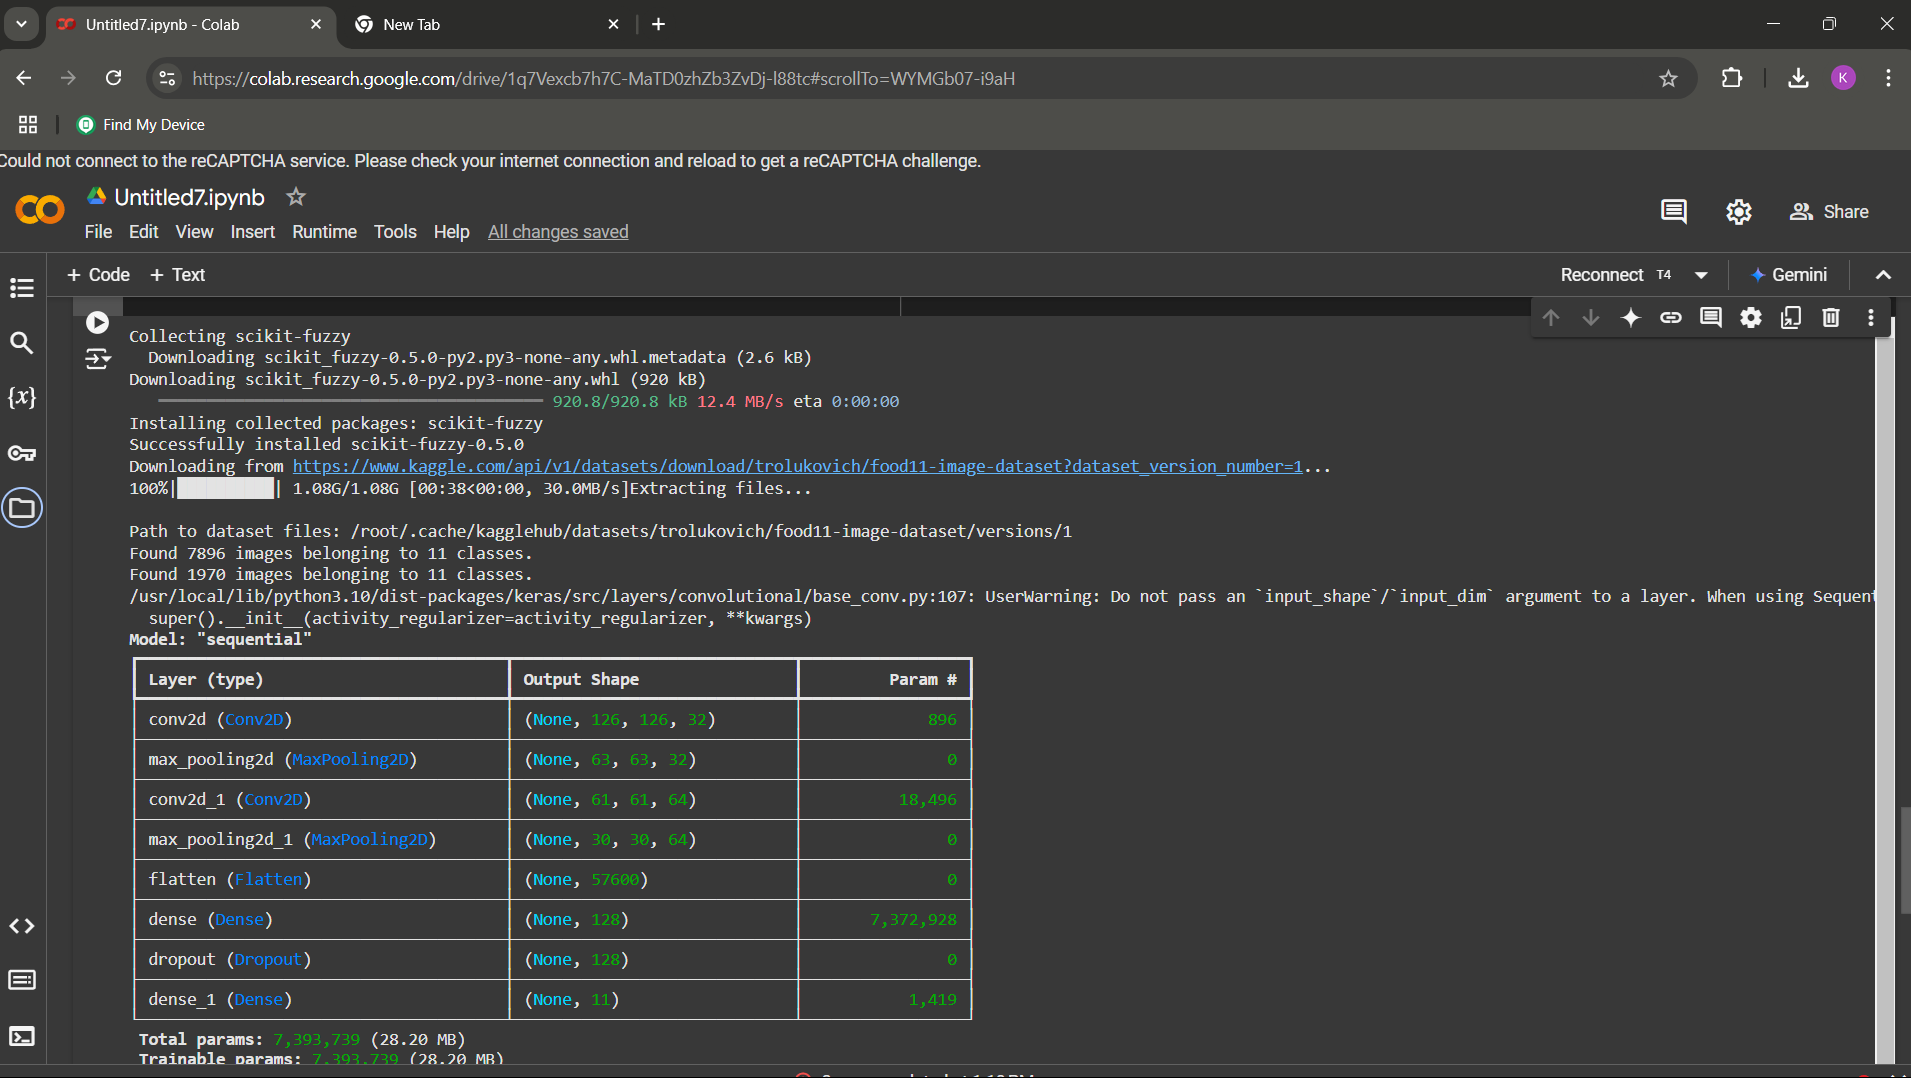

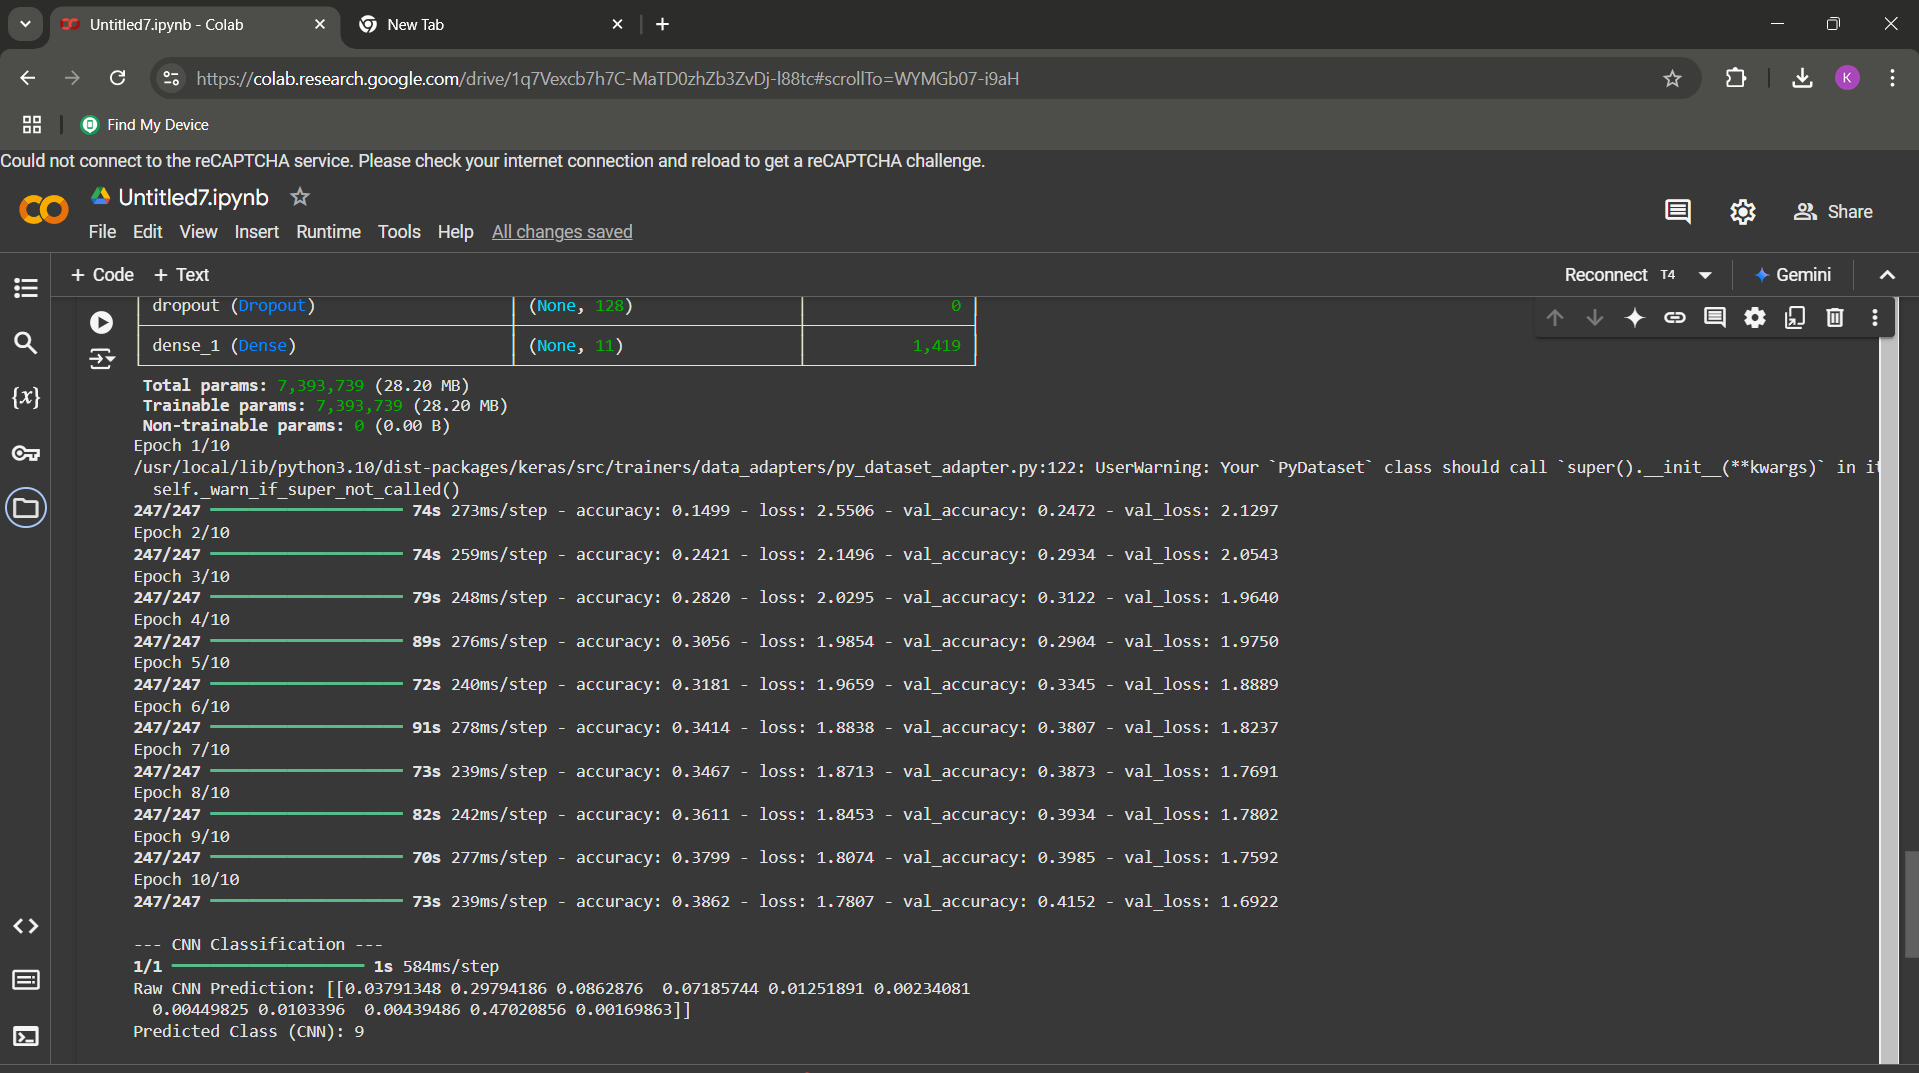

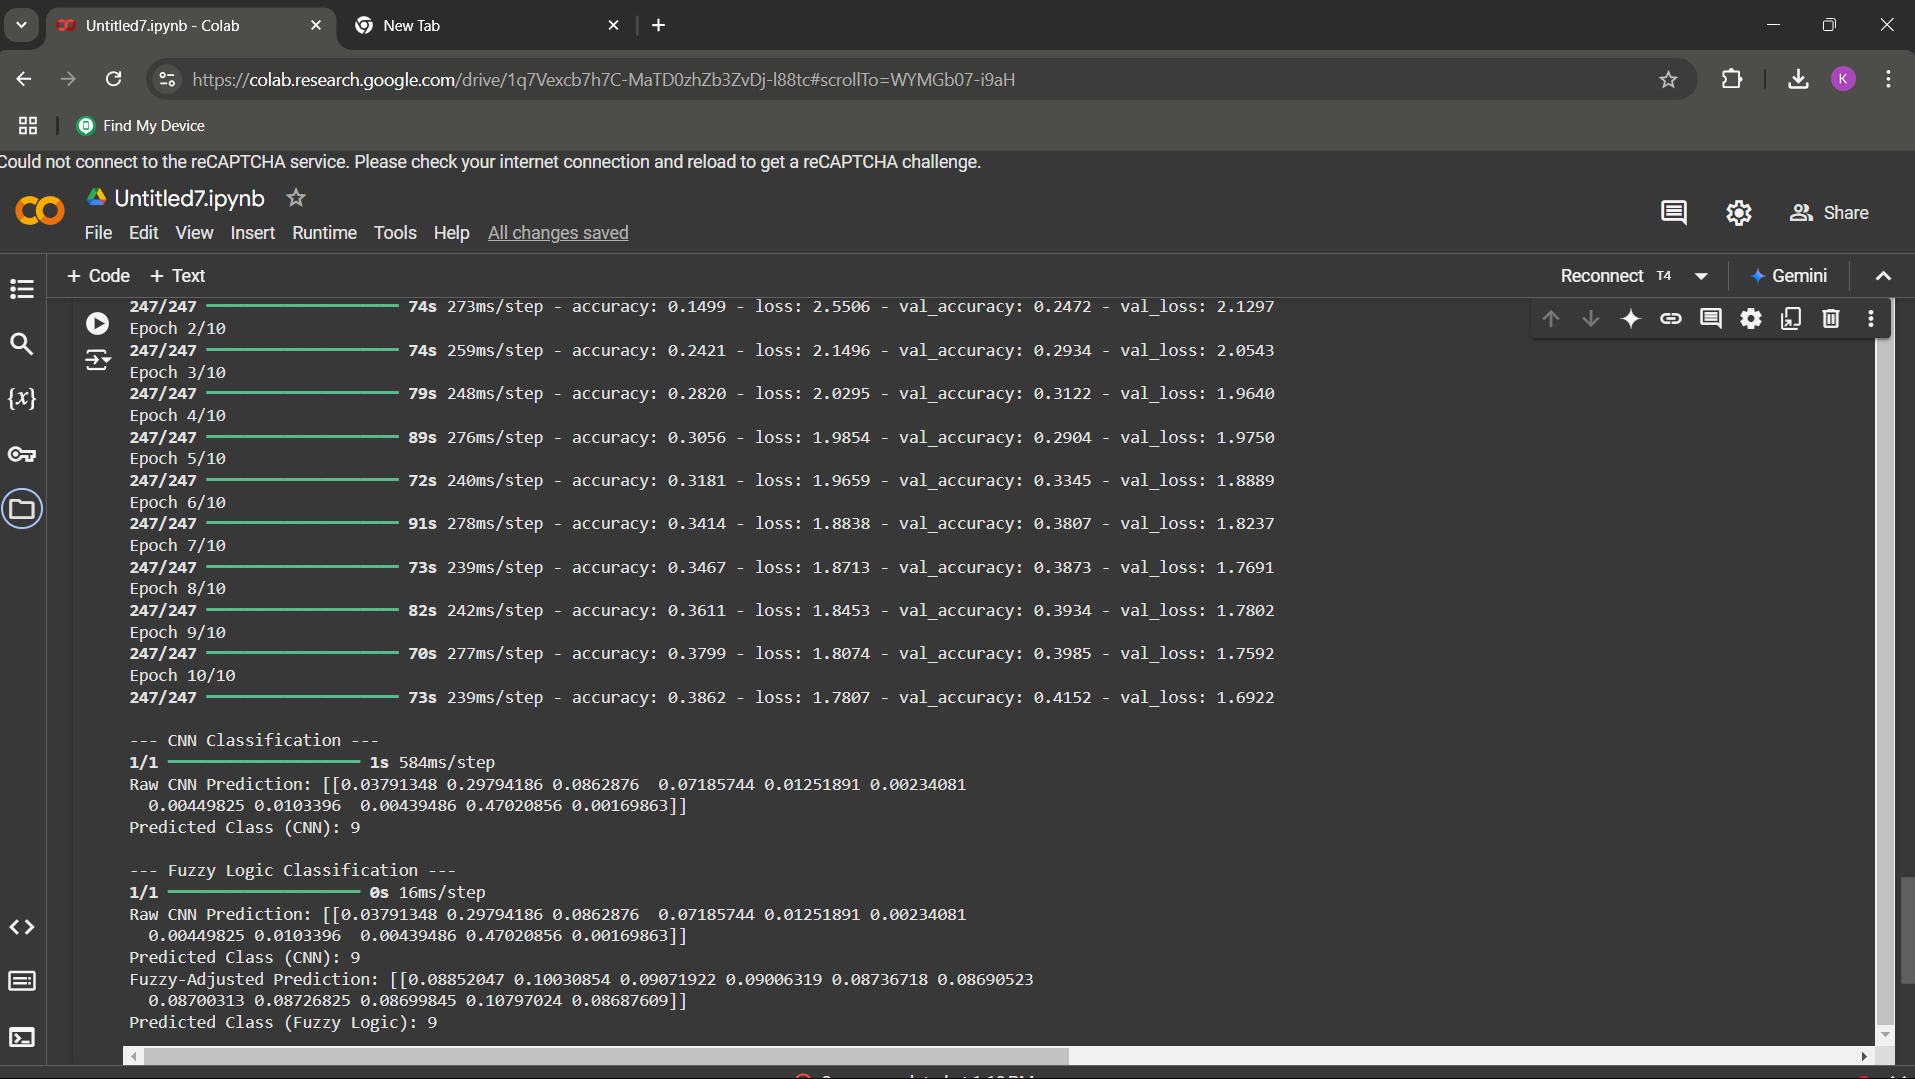